<a href="https://colab.research.google.com/github/vanshikaprjpt7/Heart-Disease-Prediction-Using-Machine-Learning-Classification-Models/blob/main/edi_majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARY & LOAD DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier


#LOAD DATA SET
df = pd.read_csv("/content/heart (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## DATA UNDERSTANDING

In [ ]:
print(df.shape)
df.info()
df.describe()
df.isnull().sum()


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Exploratory Data Analysis (EDA)

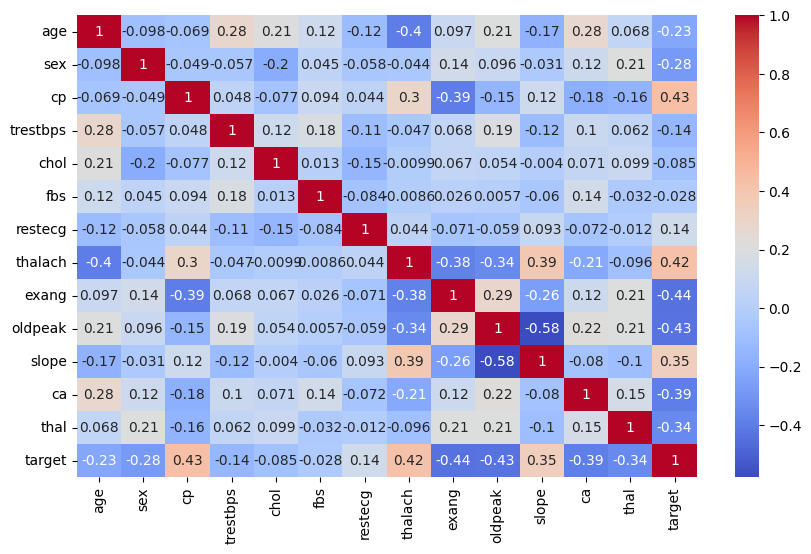

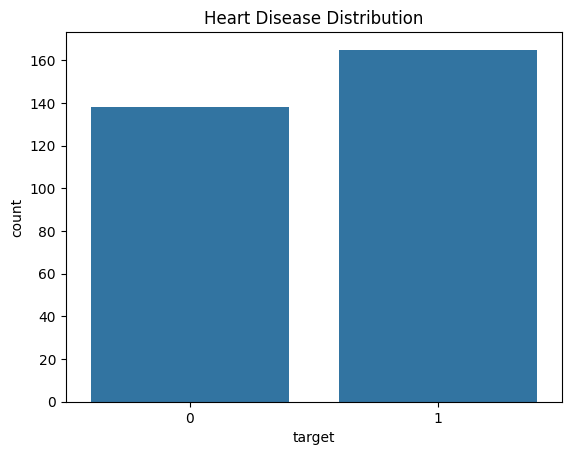

In [ ]:
#HEAT MAP
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#TARGET DISTRIBUTION
sns.countplot(x=df['target'])
plt.title("Heart Disease Distribution")
plt.show()


## Preprocessing

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## MODEL TRAINING

In [ ]:
#Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=1000)
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

## Model Evaluation Function

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }


## Compare All Models

In [ ]:
results = {
    "Logistic Regression": evaluate(log_reg, X_test, y_test),
    "Decision Tree": evaluate(dt, X_test, y_test),
    "Random Forest": evaluate(rf, X_test, y_test),
    "Neural Network": evaluate(mlp, X_test, y_test)
}

pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.852459,0.870968,0.84375,0.857143,0.926724
Decision Tree,0.754098,0.840000,0.65625,0.736842,0.759159
Random Forest,0.836066,0.843750,0.84375,0.843750,0.920259
Neural Network,0.836066,0.866667,0.81250,0.838710,0.878233


## CONFUSION MATRIX

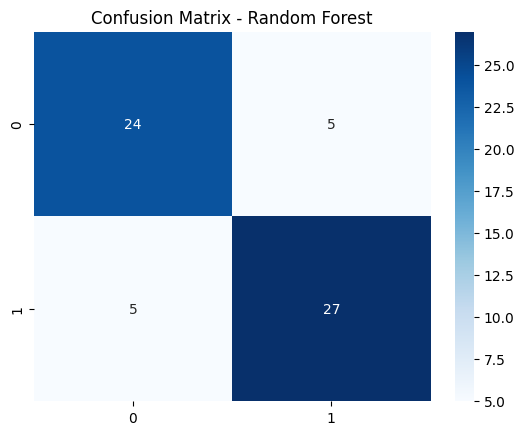

In [ ]:
best_model = rf

cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Feature Importance (Random Forest)

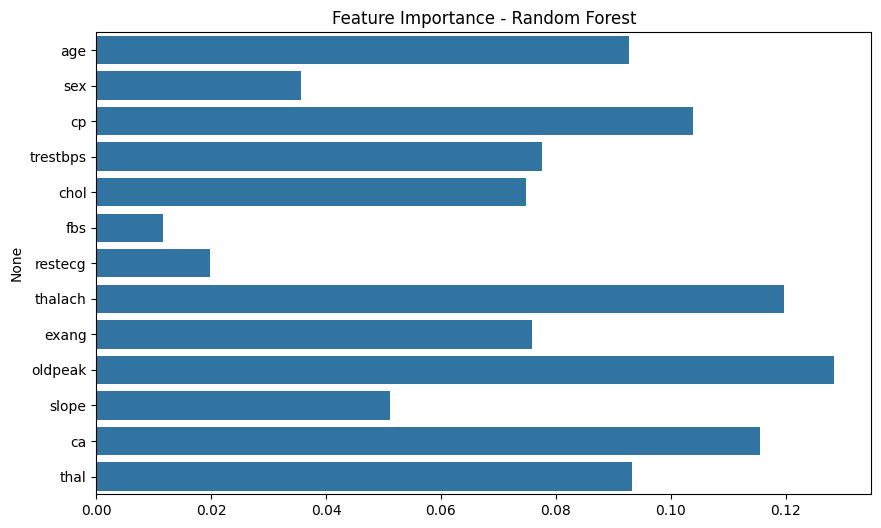

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()


##CONCLUSION

The project demonstrates how machine learning can effectively predict heart disease using patient data. Among all models tested, the Random Forest classifier achieved the highest accuracy and robustness.

Machine learning-based prediction tools can greatly assist doctors and healthcare systems in early diagnosis, reducing risk and improving patient outcomes.